In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samihamuntahamahin","key":"3b6d29c9556db74812f31ee98a90662f"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ericanacletoribeiro/cicids2017-cleaned-and-preprocessed -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/ericanacletoribeiro/cicids2017-cleaned-and-preprocessed
License(s): CC0-1.0
 69% 139M/200M [00:00<00:00, 1.45GB/s]
100% 200M/200M [00:00<00:00, 952MB/s] 


# **Exploratory Data Analysis**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/data/cicids2017_cleaned.csv')

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [5]:
df.shape

(2520751, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520751 entries, 0 to 2520750
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Length of Fwd Packets  int64  
 4   Fwd Packet Length Max        int64  
 5   Fwd Packet Length Min        int64  
 6   Fwd Packet Length Mean       float64
 7   Fwd Packet Length Std        float64
 8   Bwd Packet Length Max        int64  
 9   Bwd Packet Length Min        int64  
 10  Bwd Packet Length Mean       float64
 11  Bwd Packet Length Std        float64
 12  Flow Bytes/s                 float64
 13  Flow Packets/s               float64
 14  Flow IAT Mean                float64
 15  Flow IAT Std                 float64
 16  Flow IAT Max                 int64  
 17  Flow IAT Min                 int64  
 18  Fwd IAT Total                int64  
 19  

In [7]:
df.isna().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Length of Fwd Packets,0
Fwd Packet Length Max,0
Fwd Packet Length Min,0
Fwd Packet Length Mean,0
Fwd Packet Length Std,0
Bwd Packet Length Max,0
Bwd Packet Length Min,0


### **Check and handle duplicates**

In [8]:
df.duplicated().sum()

np.int64(161)

In [9]:
df = df.drop_duplicates()
df.shape

(2520590, 53)

In [10]:
df['Attack Type'].value_counts()

,count
Attack Type,
Normal Traffic,2094896
DoS,193745
DDoS,128014
Port Scanning,90694
Brute Force,9150
Web Attacks,2143
Bots,1948


## **Compute Correlation Matrix**

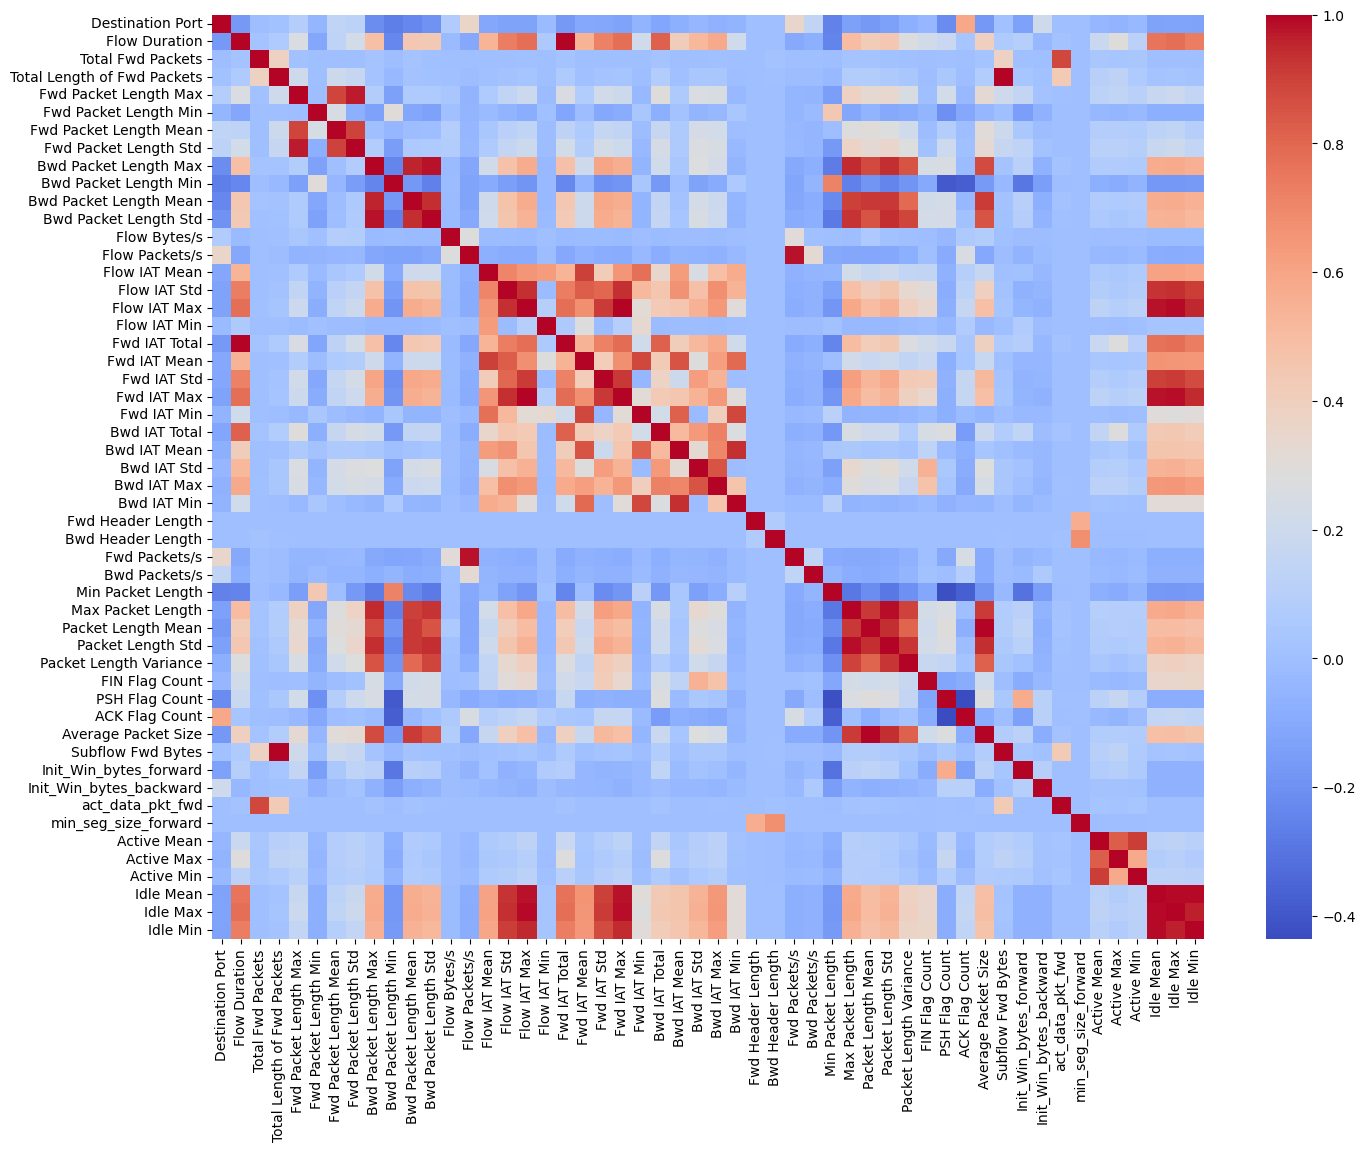

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap="coolwarm")
plt.show()


In [12]:
import numpy as np

# correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()

# select upper triangle (avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find highly correlated pairs
high_corr = [(col, idx, upper.loc[col, idx])
             for col in upper.columns
             for idx in upper.index
             if upper.loc[col, idx] > 0.90]

high_corr[:20]   # show first 20 pairs


[('Flow Duration', 'Fwd IAT Total', np.float64(0.9985301762460425)),
 ('Total Length of Fwd Packets',
  'Subflow Fwd Bytes',
  np.float64(0.9999993928733368)),
 ('Fwd Packet Length Max',
  'Fwd Packet Length Std',
  np.float64(0.9686061983825797)),
 ('Bwd Packet Length Max',
  'Bwd Packet Length Mean',
  np.float64(0.9581717136282746)),
 ('Bwd Packet Length Max',
  'Bwd Packet Length Std',
  np.float64(0.9825577848817507)),
 ('Bwd Packet Length Max',
  'Max Packet Length',
  np.float64(0.9472083660764472)),
 ('Bwd Packet Length Max',
  'Packet Length Std',
  np.float64(0.9387460690566898)),
 ('Bwd Packet Length Mean',
  'Bwd Packet Length Std',
  np.float64(0.9407495996248912)),
 ('Bwd Packet Length Mean',
  'Max Packet Length',
  np.float64(0.9030642324301791)),
 ('Bwd Packet Length Mean',
  'Packet Length Mean',
  np.float64(0.9208959441488456)),
 ('Bwd Packet Length Mean',
  'Packet Length Std',
  np.float64(0.9182243975358314)),
 ('Bwd Packet Length Mean',
  'Average Packet Size',


# **Feature Selection**

In [15]:
corr_groups = {
    "Flow Duration": ["Fwd IAT Total"],

    "Total Length of Fwd Packets": ["Subflow Fwd Bytes"],

    "Fwd Packet Length Max": ["Fwd Packet Length Std"],

    "Bwd Packet Length Max": [
        "Bwd Packet Length Mean",
        "Bwd Packet Length Std",
        "Max Packet Length",
        "Packet Length Std"
    ],

    "Bwd Packet Length Mean": [
        "Packet Length Mean",
        "Average Packet Size"
    ],

    "Flow Packets/s": ["Fwd Packets/s"],

    "Flow IAT Mean": ["Fwd IAT Mean"],

    "Flow IAT Std": [
        "Flow IAT Max",
        "Fwd IAT Max",
        "Idle Mean",
        "Idle Max"
    ]
}


In [16]:
to_drop = []

for keep, drop_list in corr_groups.items():
    for col in drop_list:
        to_drop.append(col)

print("Columns to drop:", to_drop)


Columns to drop: ['Fwd IAT Total', 'Subflow Fwd Bytes', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Max Packet Length', 'Packet Length Std', 'Packet Length Mean', 'Average Packet Size', 'Fwd Packets/s', 'Fwd IAT Mean', 'Flow IAT Max', 'Fwd IAT Max', 'Idle Mean', 'Idle Max']


In [17]:
df_reduced = df.drop(columns=to_drop)
df_reduced.shape

(2520590, 38)

In [18]:
df_reduced.to_csv("network_traffic_reduced.csv", index=False)
print("Saved as network_traffic_reduced.csv")

Saved as network_traffic_reduced.csv


# **EDA on New Dataset**

In [19]:
df1=pd.read_csv('/content/network_traffic_reduced.csv')

In [20]:
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,ACK Flag Count,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,976,0,7595.104640,...,0,29200,243,24,32,0.0,0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,976,0,7289.936810,...,0,29200,243,24,32,0.0,0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0,0,0.000000,...,1,290,243,0,32,0.0,0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,976,0,7182.267884,...,0,29200,243,24,32,0.0,0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0,0,0.000000,...,1,243,290,0,32,0.0,0,0,0,Normal Traffic


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520590 entries, 0 to 2520589
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Length of Fwd Packets  int64  
 4   Fwd Packet Length Max        int64  
 5   Fwd Packet Length Min        int64  
 6   Fwd Packet Length Mean       float64
 7   Bwd Packet Length Max        int64  
 8   Bwd Packet Length Min        int64  
 9   Flow Bytes/s                 float64
 10  Flow Packets/s               float64
 11  Flow IAT Mean                float64
 12  Flow IAT Std                 float64
 13  Flow IAT Min                 int64  
 14  Fwd IAT Std                  float64
 15  Fwd IAT Min                  int64  
 16  Bwd IAT Total                int64  
 17  Bwd IAT Mean                 float64
 18  Bwd IAT Std                  float64
 19  

In [23]:
df1.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,PSH Flag Count,ACK Flag Count,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Min
count,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,...,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06,2.520590e+06
mean,8.689420e+03,1.659138e+07,1.025937e+01,6.065630e+02,2.312140e+02,1.920495e+01,6.350589e+01,9.749875e+02,4.316292e+01,1.410795e+06,...,2.976303e-01,3.118183e-01,7.265107e+03,2.227698e+03,5.997646e+00,-3.082490e+03,9.152814e+04,1.719520e+05,6.542856e+04,8.893113e+06
std,1.901153e+04,3.523228e+07,7.944078e+02,1.011627e+04,7.563342e+02,6.080063e+01,1.955568e+02,2.038203e+03,7.088161e+01,2.657193e+07,...,4.572161e-01,4.632361e-01,1.459708e+04,8.922472e+03,6.744124e+02,1.149806e+06,6.858961e+05,1.084698e+06,6.106639e+05,2.458208e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.610000e+08,...,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.200000e+01,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,1.194377e+02,...,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.062500e+04,2.000000e+00,6.600000e+01,4.000000e+01,2.000000e+00,3.625000e+01,9.800000e+01,0.000000e+00,3.715738e+03,...,0.000000e+00,0.000000e+00,2.510000e+02,0.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.333478e+06,6.000000e+00,3.320000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.460000e+02,8.200000e+01,1.071429e+05,...,1.000000e+00,1.000000e+00,8.192000e+03,2.350000e+02,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,1.290000e+07,2.482000e+04,2.325000e+03,5.940857e+03,1.953000e+04,2.896000e+03,2.071000e+09,...,1.000000e+00,1.000000e+00,6.553500e+04,6.553500e+04,2.135570e+05,1.380000e+02,1.100000e+08,1.100000e+08,1.100000e+08,1.200000e+08


##**Compute Correlation Matrix**

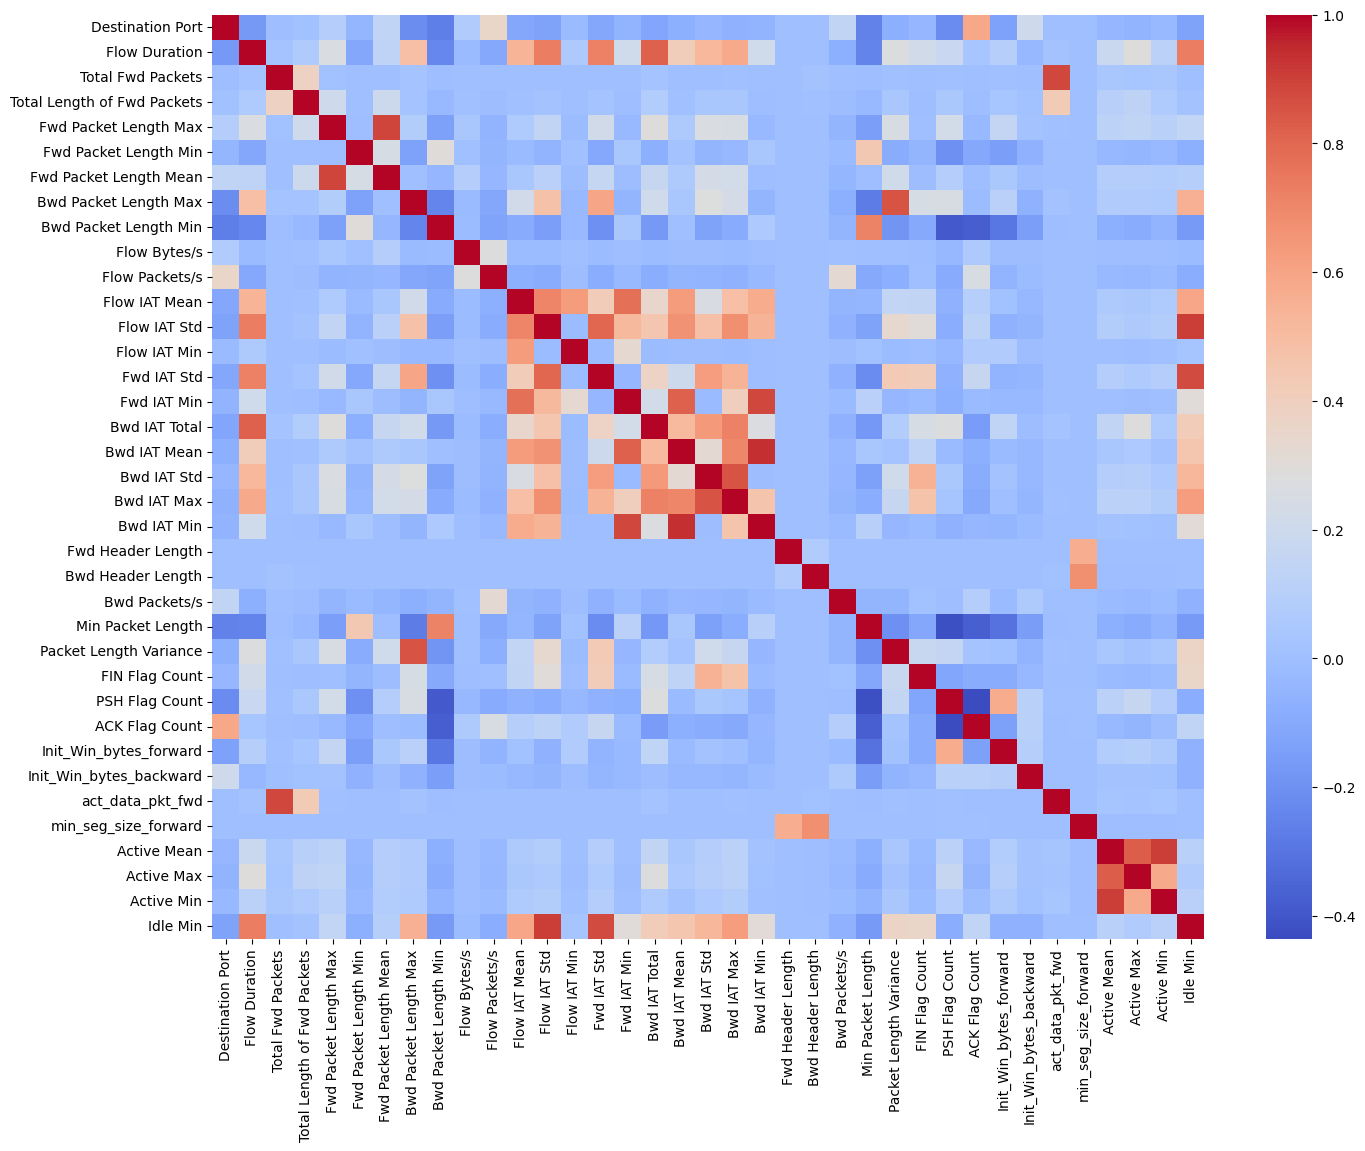

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df1.corr(numeric_only=True)

plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap="coolwarm")
plt.show()


## **Class Distribution (Target Variable)**

Attack Type
Normal Traffic    2094896
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64


/tmp/ipython-input-1236192553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts.values, palette="viridis")


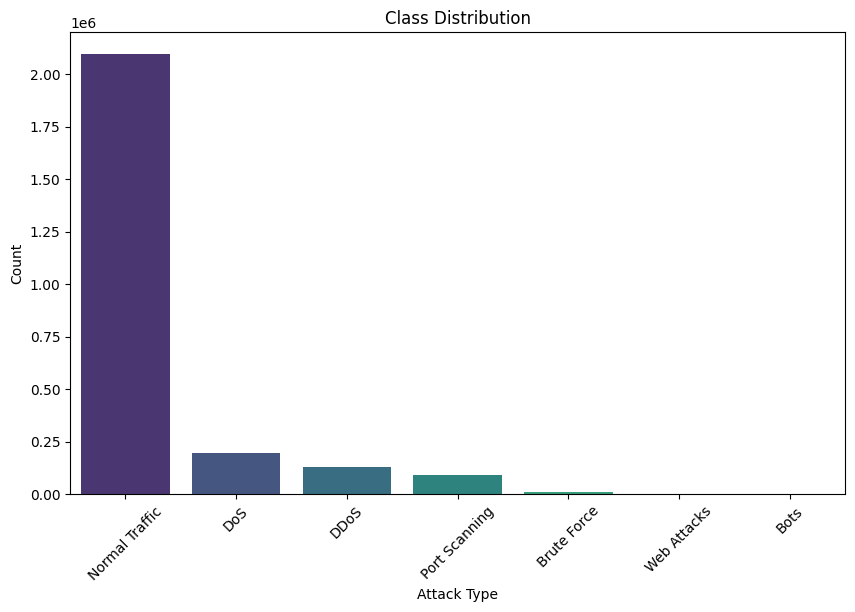

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each attack type
attack_counts = df1['Attack Type'].value_counts()
print(attack_counts)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()


## **Distribution of Numeric Features**

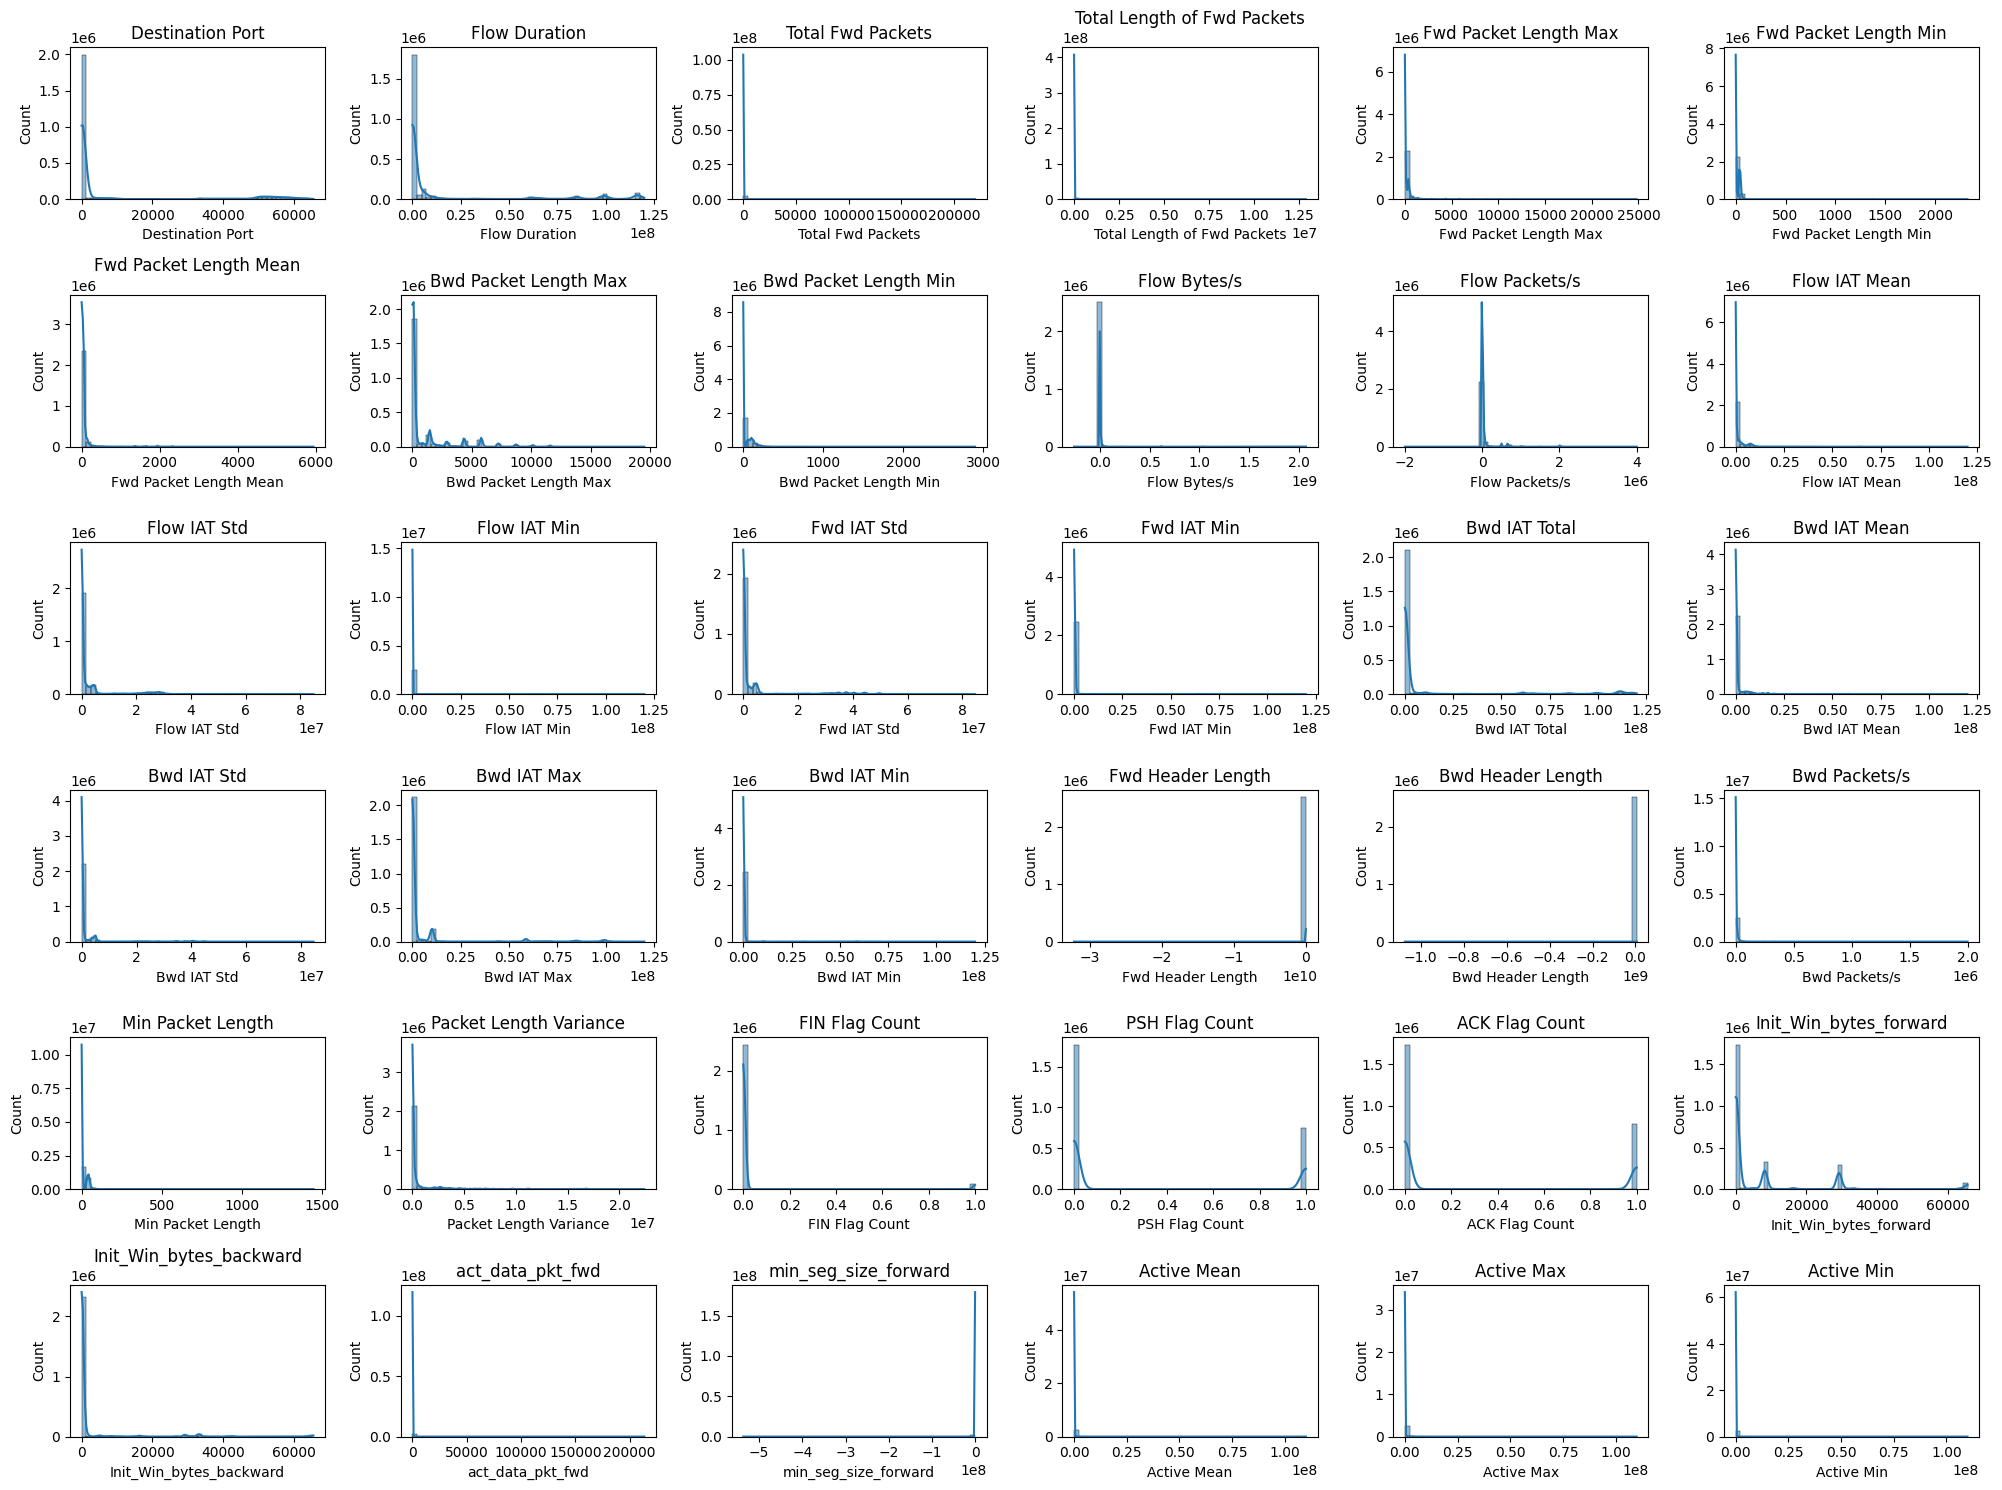

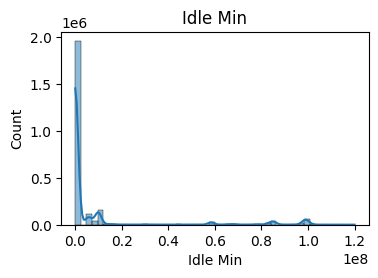

In [27]:
for i in range(0, len(numeric_cols), 36):  # 36 plots per figure
    plt.figure(figsize=(20,15))
    for j, col in enumerate(numeric_cols[i:i+36], 1):
        plt.subplot(6,6,j)
        sns.histplot(df1[col], kde=True, bins=50)
        plt.title(col)
    plt.tight_layout()
    plt.show()
